In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
tweets = pd.read_csv('Tweets.csv')
tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
text_tweet = tweets['text'].tolist()

In [4]:
text_tweet_1 = '.'.join([str(x) for x in text_tweet])

In [5]:
print(text_tweet_1)

@VirginAmerica What @dhepburn said..@VirginAmerica plus you've added commercials to the experience... tacky..@VirginAmerica I didn't today... Must mean I need to take another trip!.@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse.@VirginAmerica and it's a really big bad thing about it.@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA.@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :).@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP.@virginamerica Well, I didn't…but NOW I DO! :-D.@VirginAmerica it was amazing, and arrived an hour early. You're too good to me..@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24.@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D.@V

In [6]:
text_tweet_2 = str(text_tweet)

In [7]:
print(text_tweet_2)

['@VirginAmerica What @dhepburn said.', "@VirginAmerica plus you've added commercials to the experience... tacky.", "@VirginAmerica I didn't today... Must mean I need to take another trip!", '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse', "@VirginAmerica and it's a really big bad thing about it", "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA", '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)', '@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP', "@virginamerica Well, I didn't…but NOW I DO! :-D", "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.", '@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24', '@VirginAmerica I &lt;3 pretty graphics. so much 

In [8]:
my_cloud = WordCloud(background_color='white').generate(text_tweet_1)

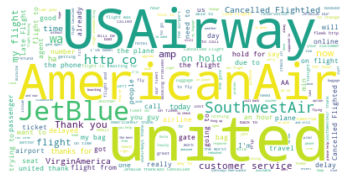

In [9]:
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
my_cloud_1 = WordCloud(background_color='white').generate(text_tweet_2)

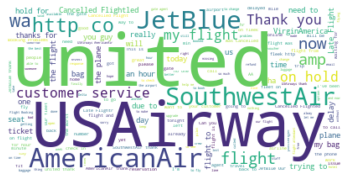

In [11]:
plt.imshow(my_cloud_1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# Define default list of stop words

In [13]:
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

In [14]:
my_cloud_2 = WordCloud(stopwords=my_stop_words).generate(text_tweet_1)

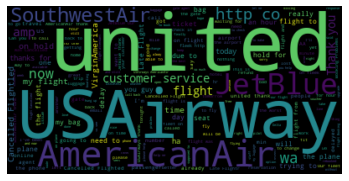

In [15]:
plt.imshow(my_cloud_2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

In [17]:
my_stop_words_1 = ENGLISH_STOP_WORDS.union(['airlines', 'airline', '@'])

In [18]:
vect = CountVectorizer(stop_words = my_stop_words)

In [19]:
vect.fit(tweets.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
X_review = vect.transform(tweets.text)

In [21]:
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())

In [22]:
X_df.head()

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# BOW using negative reason column

In [24]:
my_stop_words_negative = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])

In [25]:
vect1 = CountVectorizer(stop_words=my_stop_words_negative)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
vect1.fit(tweets.text)
vect2.fit(tweets.negativereason)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [27]:
vect_1 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)

In [28]:
X_text_1 = vect_1.transform(tweets.text)

In [30]:
print("Length of vectorizer: ", len(vect_1.get_feature_names()))

Length of vectorizer:  643


In [31]:
vect_2 = CountVectorizer().fit(tweets.text)

In [32]:
vect_2.transform(tweets.text)

<14640x15051 sparse matrix of type '<class 'numpy.int64'>'
	with 234281 stored elements in Compressed Sparse Row format>

In [33]:
print("Length of the vectorizer: ", len(vect_2.get_feature_names()))

Length of the vectorizer:  15051


In [37]:
# Tokenizing text column

In [36]:
word_tokens = [word_tokenize(review) for review in tweets.text]

In [39]:
print("Original Tokens:", word_tokens[0])

Original Tokens: ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']


In [43]:
# filter out non letter characters

letters = [[word for word in item if word.isalpha()] for item in word_tokens]


In [44]:
print('Cleaned Tokens : ', letters[0] )

Cleaned Tokens :  ['VirginAmerica', 'What', 'dhepburn', 'said']


In [45]:
let_digits = [[word for word in item if word.isalnum()] for item in word_tokens]

In [46]:
digits = [[word for word in item if word.isdigit()] for item in word_tokens]

In [50]:
let_digits[1000]

['united',
 'how',
 'can',
 'you',
 'not',
 'put',
 'my',
 'bag',
 'on',
 'plane',
 'to',
 'Seattle',
 'Flight',
 '1212',
 'Waiting',
 'in',
 'line',
 'to',
 'talk',
 'to',
 'someone',
 'about',
 'my',
 'bag',
 'Status',
 'should',
 'matter']

In [56]:
digits[0:10]

[[], [], [], [], [], ['30'], [], [], [], []]

In [58]:
# Stemming

In [59]:
porter = PorterStemmer()

In [61]:
# Transform the array of tweets to tokens
tokens = [word_tokenize(text) for text in tweets.text]

In [69]:
tokens[0:10]

[['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'],
 ['@',
  'VirginAmerica',
  'plus',
  'you',
  "'ve",
  'added',
  'commercials',
  'to',
  'the',
  'experience',
  '...',
  'tacky',
  '.'],
 ['@',
  'VirginAmerica',
  'I',
  'did',
  "n't",
  'today',
  '...',
  'Must',
  'mean',
  'I',
  'need',
  'to',
  'take',
  'another',
  'trip',
  '!'],
 ['@',
  'VirginAmerica',
  'it',
  "'s",
  'really',
  'aggressive',
  'to',
  'blast',
  'obnoxious',
  '``',
  'entertainment',
  "''",
  'in',
  'your',
  'guests',
  "'",
  'faces',
  '&',
  'amp',
  ';',
  'they',
  'have',
  'little',
  'recourse'],
 ['@',
  'VirginAmerica',
  'and',
  'it',
  "'s",
  'a',
  'really',
  'big',
  'bad',
  'thing',
  'about',
  'it'],
 ['@',
  'VirginAmerica',
  'seriously',
  'would',
  'pay',
  '$',
  '30',
  'a',
  'flight',
  'for',
  'seats',
  'that',
  'did',
  "n't",
  'have',
  'this',
  'playing',
  '.',
  'it',
  "'s",
  'really',
  'the',
  'only',
  'bad',
  'thing',
  'about',


In [66]:
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens]

In [67]:
stemmed_tokens

[['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.'],
 ['@',
  'virginamerica',
  'plu',
  'you',
  "'ve",
  'ad',
  'commerci',
  'to',
  'the',
  'experi',
  '...',
  'tacki',
  '.'],
 ['@',
  'virginamerica',
  'I',
  'did',
  "n't",
  'today',
  '...',
  'must',
  'mean',
  'I',
  'need',
  'to',
  'take',
  'anoth',
  'trip',
  '!'],
 ['@',
  'virginamerica',
  'it',
  "'s",
  'realli',
  'aggress',
  'to',
  'blast',
  'obnoxi',
  '``',
  'entertain',
  "''",
  'in',
  'your',
  'guest',
  "'",
  'face',
  '&',
  'amp',
  ';',
  'they',
  'have',
  'littl',
  'recours'],
 ['@',
  'virginamerica',
  'and',
  'it',
  "'s",
  'a',
  'realli',
  'big',
  'bad',
  'thing',
  'about',
  'it'],
 ['@',
  'virginamerica',
  'serious',
  'would',
  'pay',
  '$',
  '30',
  'a',
  'flight',
  'for',
  'seat',
  'that',
  'did',
  "n't",
  'have',
  'thi',
  'play',
  '.',
  'it',
  "'s",
  'realli',
  'the',
  'onli',
  'bad',
  'thing',
  'about',
  'fli',
  'VA'],
 ['@',
  'virgin

In [70]:
print(len(tokens))

14640


In [71]:
print(len(stemmed_tokens))

14640


In [72]:
# TFIDF

In [74]:
my_pattern = r'\b[^\d\W][^\d\W]+\b'

In [75]:
vect = TfidfVectorizer(ngram_range=(1,2), max_features=100, token_pattern=my_pattern, stop_words='english')

In [76]:
vect.fit(tweets.text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=100,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='\\b[^\\d\\W][^\\d\\W]+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [77]:
# transforming
X_text = vect.transform(tweets.text)

In [79]:
X_df = pd.DataFrame(X_text.toarray(), columns=vect.get_feature_names())

In [80]:
X_df.head()

,aa,agent,airline,airport,americanair,amp,bag,baggage,bags,cancelled,...,ve,virginamerica,wait,waiting,want,way,weather,work,worst,yes
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.544485,0.531770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.407271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.537247,0.0,0.0,0.0,0.0,...,0.000000,0.559828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.663756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
